In [1]:
import dca_frustratometer
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

# Measure Frustration of Complete PDB

In [2]:
structure=dca_frustratometer.Structure.full_pdb('./data/3VI6_A.pdb',"A")
AWSEM_model=dca_frustratometer.AWSEMFrustratometer(structure,distance_cutoff_contact=9.5)

@> 1548 atoms and 1 coordinate set(s) were parsed in 0.05s.
/Users/fajer/anaconda3/lib/python3.6/site-packages/Bio/PDB/PDBParser.py:399: PDBConstructionWarning: Ignoring unrecognized record 'END' at line 1552
  PDBConstructionWarning,
@> 1548 atoms and 1 coordinate set(s) were parsed in 0.03s.


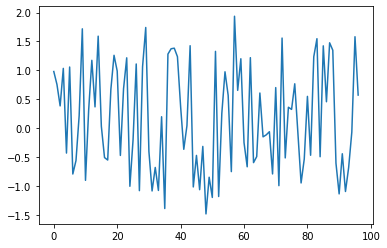

In [3]:
plt.plot(AWSEM_model.frustration(kind='singleresidue'))

In [4]:
print(AWSEM_model.native_energy())

-595.6931694225709


### Single Residue Frustration

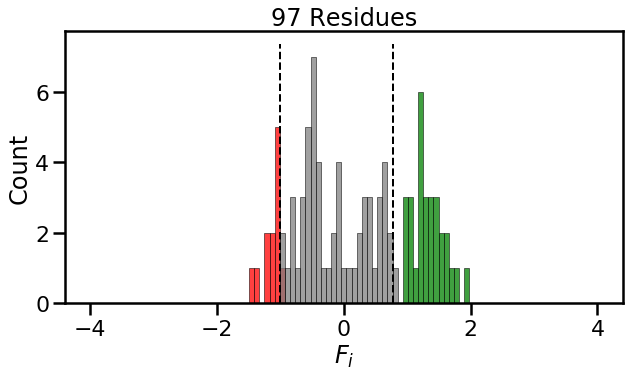

29.90% of Residues are Minimally Frustrated
12.37% of Residues are Frustrated
57.73% of Residues are Neutral


In [5]:
AWSEM_model.view_frustration_histogram(kind="singleresidue")

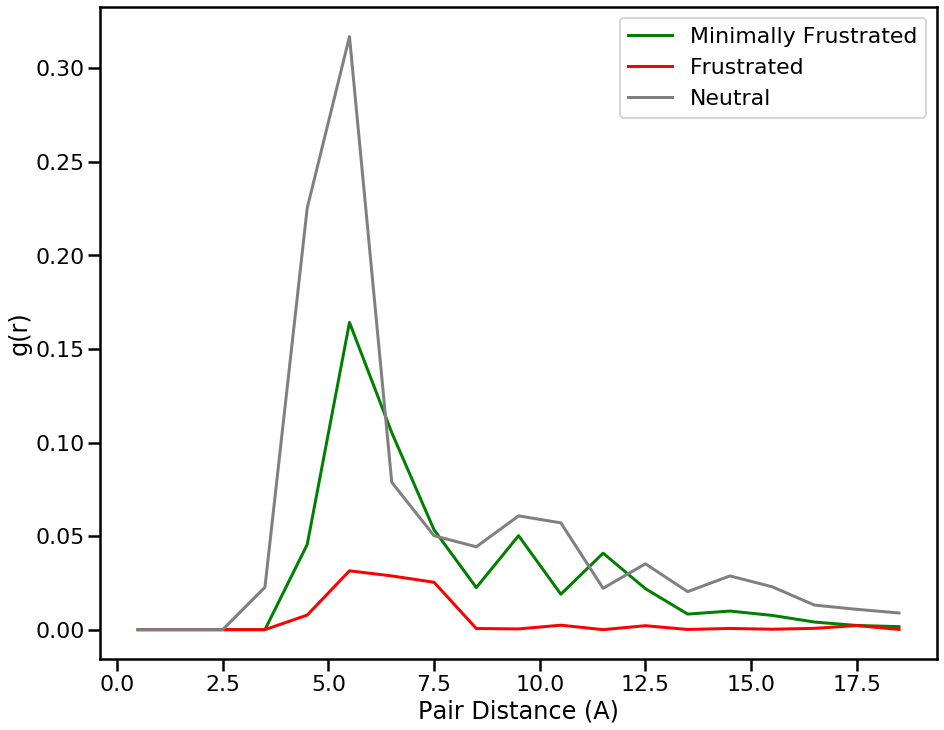

In [6]:
AWSEM_model.view_frustration_pair_distribution(kind="singleresidue")

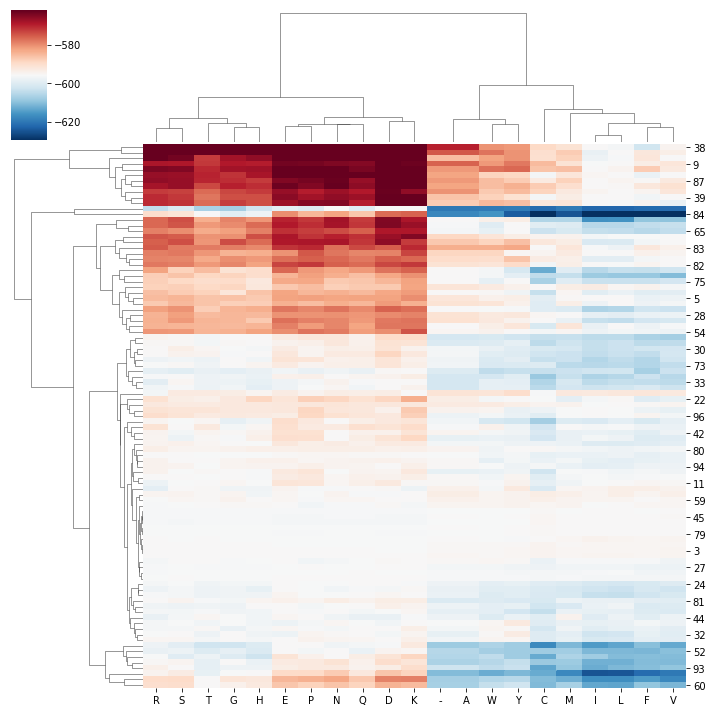

In [7]:
AWSEM_model.plot_decoy_energy(kind='singleresidue')

### Mutational Frustration

/Volumes/Seagate_Extra_Files/Time-Devolution-Calc/DCA_Energy_Calculations/Github_DCA_Frustratometer/DCA_Frustratometer/dca_frustratometer/frustration/frustratometer.py:335: RuntimeWarning: invalid value encountered in true_divide
  contact_frustration = -mean_energy / (std_energy + correction)


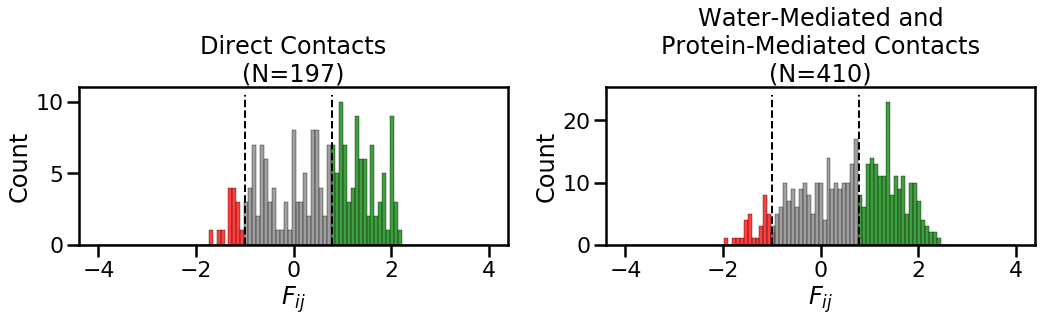

45.69% of Direct Contacts are Minimally Frustrated
7.61% of Direct Contacts are Frustrated
46.70% of Direct Contacts are Neutral
###
44.39% of Water-Mediated Contacts are Minimally Frustrated
8.05% of Water-Mediated Contacts are Frustrated
47.56% of Water-Mediated Contacts are Neutral


In [8]:
AWSEM_model.view_frustration_histogram(kind="mutational")

/Volumes/Seagate_Extra_Files/Time-Devolution-Calc/DCA_Energy_Calculations/Github_DCA_Frustratometer/DCA_Frustratometer/dca_frustratometer/frustration/frustratometer.py:335: RuntimeWarning: invalid value encountered in true_divide
  contact_frustration = -mean_energy / (std_energy + correction)


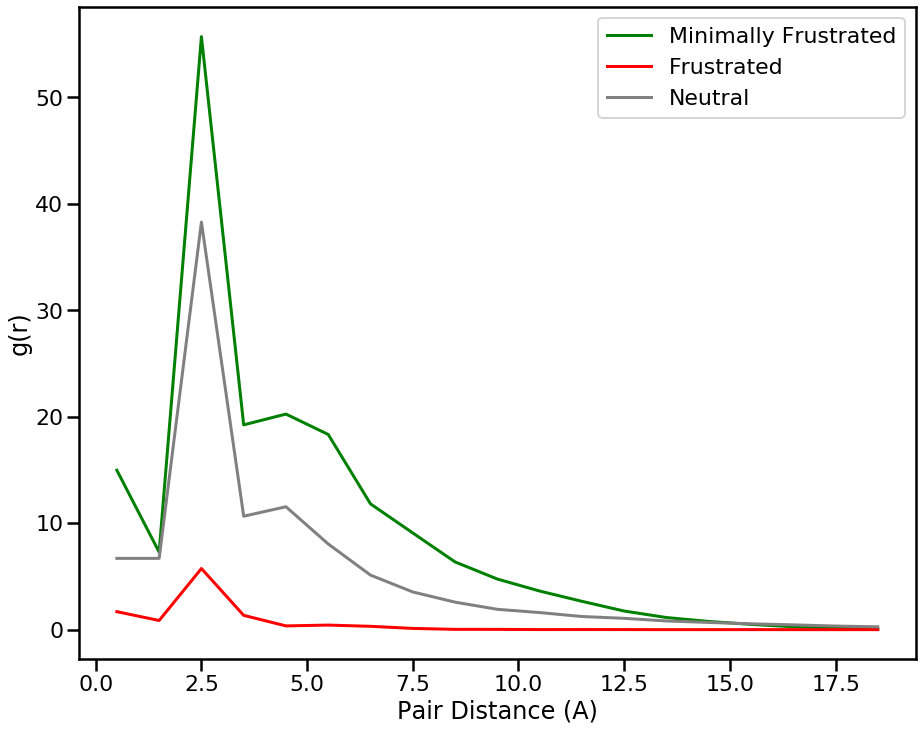

In [9]:
AWSEM_model.view_frustration_pair_distribution(kind="mutational")

/Volumes/Seagate_Extra_Files/Time-Devolution-Calc/DCA_Energy_Calculations/Github_DCA_Frustratometer/DCA_Frustratometer/dca_frustratometer/frustration/frustratometer.py:335: RuntimeWarning: invalid value encountered in true_divide
  contact_frustration = -mean_energy / (std_energy + correction)


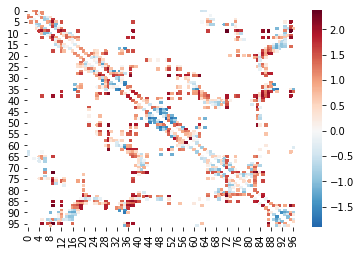

In [10]:
sns.heatmap(AWSEM_model.frustration(kind='mutational'),cmap='RdBu_r',center=0)

In [11]:
AWSEM_model.view_frustration()


You appear to be running in JupyterLab (or JavaScript failed to load for some other reason). You need to install the 3dmol extension: 
 jupyter labextension install jupyterlab_3dmol

# Measure Frustration of PDB Segment

## Ribonuclease A (PDB: 1RNB)

In [12]:
#Use original pdb residue numbering when providing initial and final indices.
structure=dca_frustratometer.Structure.full_pdb('./data/1rnb.pdb',"A")
AWSEM_model=dca_frustratometer.AWSEMFrustratometer(structure,distance_cutoff_contact=8)

@> 957 atoms and 1 coordinate set(s) were parsed in 0.01s.
/Users/fajer/anaconda3/lib/python3.6/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain C is discontinuous at line 1347.
  PDBConstructionWarning,
/Users/fajer/anaconda3/lib/python3.6/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain A is discontinuous at line 1360.
  PDBConstructionWarning,
@> 1008 atoms and 1 coordinate set(s) were parsed in 0.01s.


In [13]:
AWSEM_model.view_frustration()

/Volumes/Seagate_Extra_Files/Time-Devolution-Calc/DCA_Energy_Calculations/Github_DCA_Frustratometer/DCA_Frustratometer/dca_frustratometer/frustration/frustratometer.py:335: RuntimeWarning: invalid value encountered in true_divide
  contact_frustration = -mean_energy / (std_energy + correction)


You appear to be running in JupyterLab (or JavaScript failed to load for some other reason). You need to install the 3dmol extension: 
 jupyter labextension install jupyterlab_3dmol

In [14]:
#Use original pdb residue numbering when providing initial and final indices.
structure=dca_frustratometer.Structure.spliced_pdb('./data/1rnb.pdb',"A",seq_selection="resnum `2to23`")
AWSEM_model=dca_frustratometer.AWSEMFrustratometer(structure,distance_cutoff_contact=8)

@> 1717 atoms and 1 coordinate set(s) were parsed in 0.02s.
/Users/fajer/anaconda3/lib/python3.6/site-packages/Bio/PDB/PDBParser.py:399: PDBConstructionWarning: Ignoring unrecognized record 'END' at line 1721
  PDBConstructionWarning,
@> 1717 atoms and 1 coordinate set(s) were parsed in 0.02s.


In [15]:
AWSEM_model.view_frustration()

/Volumes/Seagate_Extra_Files/Time-Devolution-Calc/DCA_Energy_Calculations/Github_DCA_Frustratometer/DCA_Frustratometer/dca_frustratometer/frustration/frustratometer.py:335: RuntimeWarning: invalid value encountered in true_divide
  contact_frustration = -mean_energy / (std_energy + correction)


You appear to be running in JupyterLab (or JavaScript failed to load for some other reason). You need to install the 3dmol extension: 
 jupyter labextension install jupyterlab_3dmol

## Cytochrome C (PDB: 1CYC)

In [16]:
structure=dca_frustratometer.Structure.spliced_pdb('./data/1cyc.pdb',"A",seq_selection="resindex `0to50`")
AWSEM_model=dca_frustratometer.AWSEMFrustratometer(structure,distance_cutoff_contact=8)

@> 1615 atoms and 1 coordinate set(s) were parsed in 0.02s.
/Users/fajer/anaconda3/lib/python3.6/site-packages/Bio/PDB/PDBParser.py:399: PDBConstructionWarning: Ignoring unrecognized record 'END' at line 1619
  PDBConstructionWarning,
@> 1615 atoms and 1 coordinate set(s) were parsed in 0.02s.


In [17]:
AWSEM_model.view_frustration()

/Volumes/Seagate_Extra_Files/Time-Devolution-Calc/DCA_Energy_Calculations/Github_DCA_Frustratometer/DCA_Frustratometer/dca_frustratometer/frustration/frustratometer.py:335: RuntimeWarning: invalid value encountered in true_divide
  contact_frustration = -mean_energy / (std_energy + correction)


You appear to be running in JupyterLab (or JavaScript failed to load for some other reason). You need to install the 3dmol extension: 
 jupyter labextension install jupyterlab_3dmol

## TIM (PDB: 1TIM)

In [18]:
structure=dca_frustratometer.Structure.spliced_pdb('./data/1tim.pdb',"A",seq_selection="resindex `30to80`")
AWSEM_model=dca_frustratometer.AWSEMFrustratometer(structure,distance_cutoff_contact=8)

@> 3758 atoms and 1 coordinate set(s) were parsed in 0.04s.
/Users/fajer/anaconda3/lib/python3.6/site-packages/Bio/PDB/PDBParser.py:399: PDBConstructionWarning: Ignoring unrecognized record 'END' at line 3762
  PDBConstructionWarning,
@> 3758 atoms and 1 coordinate set(s) were parsed in 0.04s.


In [19]:
AWSEM_model.view_frustration()

/Volumes/Seagate_Extra_Files/Time-Devolution-Calc/DCA_Energy_Calculations/Github_DCA_Frustratometer/DCA_Frustratometer/dca_frustratometer/frustration/frustratometer.py:335: RuntimeWarning: invalid value encountered in true_divide
  contact_frustration = -mean_energy / (std_energy + correction)


You appear to be running in JupyterLab (or JavaScript failed to load for some other reason). You need to install the 3dmol extension: 
 jupyter labextension install jupyterlab_3dmol

## Trypsin (PDB: 3PTN)

In [20]:
structure=dca_frustratometer.Structure.spliced_pdb('./data/3ptn.pdb',"A",seq_selection="resindex `40to65`")
AWSEM_model=dca_frustratometer.AWSEMFrustratometer(structure,distance_cutoff_contact=8)

@> 3220 atoms and 1 coordinate set(s) were parsed in 0.03s.
@> 3220 atoms and 1 coordinate set(s) were parsed in 0.04s.


In [21]:
AWSEM_model.view_frustration()

/Volumes/Seagate_Extra_Files/Time-Devolution-Calc/DCA_Energy_Calculations/Github_DCA_Frustratometer/DCA_Frustratometer/dca_frustratometer/frustration/frustratometer.py:335: RuntimeWarning: invalid value encountered in true_divide
  contact_frustration = -mean_energy / (std_energy + correction)


You appear to be running in JupyterLab (or JavaScript failed to load for some other reason). You need to install the 3dmol extension: 
 jupyter labextension install jupyterlab_3dmol

## FGF (PDB: 1RG8)

In [22]:
structure=dca_frustratometer.Structure.spliced_pdb('./data/1rg8.pdb',"A",seq_selection="resindex `10to55`")
AWSEM_model=dca_frustratometer.AWSEMFrustratometer(structure,distance_cutoff_contact=8)

@> 2246 atoms and 1 coordinate set(s) were parsed in 0.02s.
/Users/fajer/anaconda3/lib/python3.6/site-packages/Bio/PDB/PDBParser.py:399: PDBConstructionWarning: Ignoring unrecognized record 'END' at line 2250
  PDBConstructionWarning,
@> 2246 atoms and 1 coordinate set(s) were parsed in 0.02s.


In [23]:
AWSEM_model.view_frustration()

/Volumes/Seagate_Extra_Files/Time-Devolution-Calc/DCA_Energy_Calculations/Github_DCA_Frustratometer/DCA_Frustratometer/dca_frustratometer/frustration/frustratometer.py:335: RuntimeWarning: invalid value encountered in true_divide
  contact_frustration = -mean_energy / (std_energy + correction)


You appear to be running in JupyterLab (or JavaScript failed to load for some other reason). You need to install the 3dmol extension: 
 jupyter labextension install jupyterlab_3dmol